## Análisis de bases de datos  

### <b>Taller 5: Análisis de componentes principales</b>  

Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
David Sebastián Mendoza Cruz - damendozac@unal.edu.co  
David Alejandro Alquichire Rincón - dalquichire@unal.edu.co  
Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
Juan David Bernal - jubernalv@unal.edu.co

En el Excel adjunto encontrarán una base de datos correspondiente a la composición nutricional de hamburguesas producidas por las siguientes empresas: Arby's, Burger King, Chick-fil-a, Dairy Queen, McDonald's y Sonic. La información de la composición nutricional de las hamburguesas contiene los siguientes atributos: 
- Calories 
- TotalFat_g (Grasa total en gramos).
- Sodium_mg (Sodio en miligramos).
- CaloriesFromFat (Calorías proveniente de grasas en gramos)
- SaturatedFat_g (Grasas saturadas en gramos)
- TransFat_g (Grasas trans en gramos)
- Cholesterol_mg (Colesterol en mili gramos)
- Carbohydrates_g (Carbohidratos en gramos)
- Fiber_g (Fibra en gramos)
- Sugars_g (Azúcar en gramos)
- Protein_g (Proteínas en gramos)


In [2]:
# Importamos algunas librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Leemos el archivo
Hamburguesas = pd.read_csv('Hamburguesas.csv')
Hamburguesas.head(5)

,Meat,Type,Sandwich,Calories,TotalFat_g,Sodium_mg,CaloriesFromFat,SaturatedFat_g,TransFat_g,Cholesterol_mg,Carbohydrates_g,Fiber_g,Sugars_g,Protein_g,Restaurant
0,Ham,Sandwich,Arby-Q Sandwich,400,10,1230,90,"3,0","0,0",30,58,3,23,18,Arby's
1,Ham,Crossover,Arby’s Melt,330,11,920,100,"4,0","0,0",30,40,2,5,18,Arby's
2,Beef,Crossover,Beef ‘n Cheddar Classic,440,18,1290,160,"5,0","1,0",45,47,2,9,23,Arby's
3,Beef,Crossover,Beef ‘n Cheddar Mid,530,23,1720,200,"7,0","1,0",80,48,2,9,34,Arby's
4,Beef,Burger,Jr Deluxe Sandwich,260,12,560,110,"3,0","0,0",30,26,2,4,13,Arby's


1. Mapa de calor para la matriz de correlación.

In [4]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = Hamburguesas.select_dtypes(include=['number']).corr(method='pearson')
Tabular_corr_matrix(corr_matrix).head(8)

,variable_1,variable_2,correlación
28,CaloriesFromFat,TotalFat_g,0.999579
12,TotalFat_g,CaloriesFromFat,0.999579
3,Calories,CaloriesFromFat,0.944555
27,CaloriesFromFat,Calories,0.944555
9,TotalFat_g,Calories,0.942956
1,Calories,TotalFat_g,0.942956
76,Protein_g,Cholesterol_mg,0.904780
44,Cholesterol_mg,Protein_g,0.904780


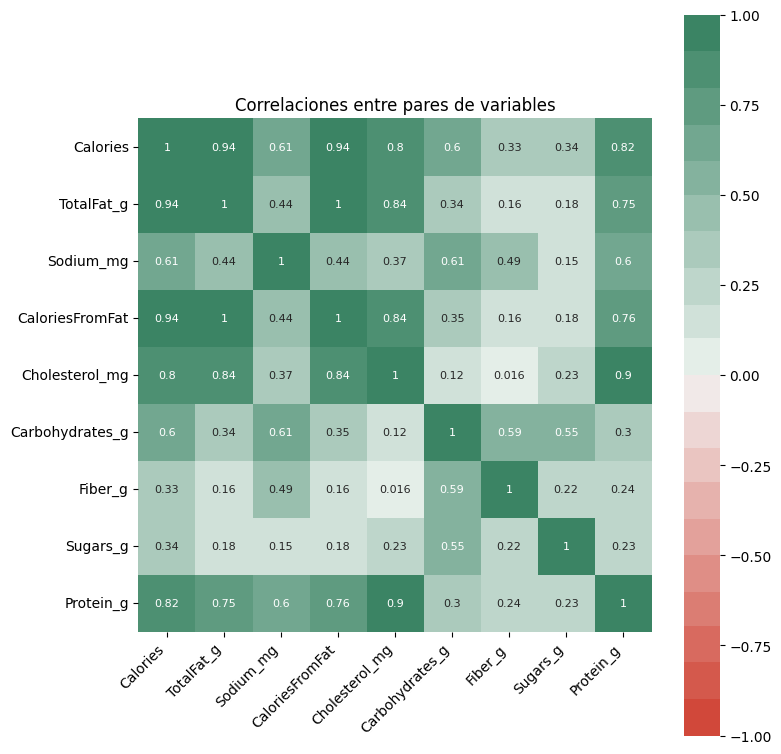

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sb.diverging_palette(15, 150, n=20),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)
ax.set_title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

2. Matriz de datos centralizados.

3. Cálculo de SVD para la matriz de covarianza.


4. Cálculo del porcentaje de participación de cada valor propio.

5. Determine cuál o cuáles atributos son los más representativos de los datos. Puede distinguirse un grupo de atributos que represente el 90% de los datos?

6. Si es posible, clasifique los atributos en orden de importancia, según participen con mayor proporción en la representación de los datos.

7. Determine si los datos determinan de alguna manera la empresa de donde provienen las hamburguesas.

8. Haga un gráfico tridimensional de los datos usando:
- Los tres atributos más representativos.
- Las tres componentes más representativas asociadas a los tres valores propios más representativos.